Demonstrate the Logistic Regression API. We will use text data to do a binary classification task.
1. Create Count Matrix
2. Build Logitic Regression Model
3. Apply Regularization
4. Do grid search to tune regularization terms

In [3]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
data_dir=r"C:\Users\solharsh\Desktop\Data Science\Machine Learning\Jigsaw\Logistic Regression\Data -  Logistic Regression\Data"
os.chdir(data_dir)

In [5]:
review_data=pd.read_table('movie_reviews.tsv',sep="\t")

In [6]:
review_data.head()

,id,sentiment,review
0,5814_8,1,With all this stuff going down at the moment w...
1,2381_9,1,"\The Classic War of the Worlds\"" by Timothy Hi..."
2,7759_3,0,The film starts with a manager (Nicholas Bell)...
3,3630_4,0,It must be assumed that those who praised this...
4,9495_8,1,Superbly trashy and wondrously unpretentious 8...


In [7]:
review_data.isnull().sum()

id           0
sentiment    0
review       0
dtype: int64

In [9]:
review_data.dtypes

id           object
sentiment     int64
review       object
dtype: object

In [10]:
review_data['sentiment'].describe()

count    25000.00000
mean         0.50000
std          0.50001
min          0.00000
25%          0.00000
50%          0.50000
75%          1.00000
max          1.00000
Name: sentiment, dtype: float64

In [12]:
review_data.head()

,id,sentiment,review
0,5814_8,1,With all this stuff going down at the moment w...
1,2381_9,1,"\The Classic War of the Worlds\"" by Timothy Hi..."
2,7759_3,0,The film starts with a manager (Nicholas Bell)...
3,3630_4,0,It must be assumed that those who praised this...
4,9495_8,1,Superbly trashy and wondrously unpretentious 8...


### Creating text features

In [16]:
## Creating Features
demo_text=["This is sentence one.", "This is sentence two.", "This is a very very long sentence three."]

In [17]:
import sklearn.feature_extraction.text as text

In [18]:
cv=text.CountVectorizer(demo_text)
count_matrix=cv.fit_transform(demo_text)
cv.get_feature_names()

['is', 'long', 'one', 'sentence', 'this', 'three', 'two', 'very']

In [19]:
count_matrix.toarray()

array([[1, 0, 1, 1, 1, 0, 0, 0],
       [1, 0, 0, 1, 1, 0, 1, 0],
       [1, 1, 0, 1, 1, 1, 0, 2]], dtype=int64)

In [20]:
pd.DataFrame(count_matrix.toarray(),columns=cv.get_feature_names())

,is,long,one,sentence,this,three,two,very
0,1,0,1,1,1,0,0,0
1,1,0,0,1,1,0,1,0
2,1,1,0,1,1,1,0,2


In [21]:
## Create Features for the linear classifier 
cv=text.CountVectorizer(review_data['review'].tolist(),max_features = 5000)
X=cv.fit_transform(review_data['review'])
X.shape

(25000, 5000)

In [22]:
y=review_data['sentiment']

In [23]:
import sklearn.model_selection as model_selection
X_train,X_test,y_train,y_test=model_selection.train_test_split(X,y,test_size=0.2,random_state=200)

In [24]:
import sklearn.linear_model as linear_model
clf=linear_model.LogisticRegression()

In [ ]:
#here 1/c = lambda so higher the value of C, lower the value of lambda

In [25]:
mod=clf.fit(X,y)

C:\Users\solharsh\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [26]:
mod.predict_proba(X_test)

array([[7.21147826e-01, 2.78852174e-01],
       [9.99534628e-01, 4.65372187e-04],
       [9.99998702e-01, 1.29761231e-06],
       ...,
       [6.09312312e-03, 9.93906877e-01],
       [9.99969277e-01, 3.07225221e-05],
       [9.99967427e-01, 3.25732120e-05]])

In [27]:
mod.classes_

array([0, 1], dtype=int64)

In [29]:
np.random.seed(300)
mod=model_selection.GridSearchCV(clf,param_grid={"penalty":["l1"],"C":np.random.uniform(0,120,2)})
mod.fit(X_train,y_train)

C:\Users\solharsh\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\solharsh\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'C': array([54.13470824, 26.52268101]),
                         'penalty': ['l1']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [30]:
mod.best_estimator_

LogisticRegression(C=26.522681005625447, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [31]:
mod.best_score_

0.83115

In [32]:
mod.predict_proba(X_test)

array([[8.08644372e-01, 1.91355628e-01],
       [1.00000000e+00, 1.32307548e-15],
       [1.00000000e+00, 4.29206724e-28],
       ...,
       [7.36521955e-13, 1.00000000e+00],
       [1.00000000e+00, 1.34377236e-23],
       [1.00000000e+00, 1.36032561e-23]])

In [33]:
import sklearn.metrics as metrics

In [34]:
metrics.roc_curve(y_test,mod.predict_proba(X_test)[:,1])

(array([0.        , 0.00872324, 0.00951626, ..., 0.99206979, 0.99206979,
        1.        ]),
 array([0.        , 0.27683616, 0.28853914, ..., 0.99959645, 1.        ,
        1.        ]),
 array([2.00000000e+000, 1.00000000e+000, 1.00000000e+000, ...,
        5.10581436e-061, 4.47031788e-061, 9.11374918e-100]))

In [35]:
fpr,tpr,thresholds=metrics.roc_curve(y_test,mod.predict_proba(X_test)[:,1])

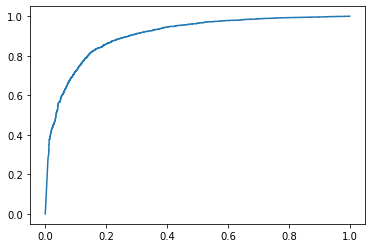

In [36]:
plt.plot(fpr,tpr,"-")

In [37]:
metrics.roc_auc_score(y_test,mod.predict_proba(X_test)[:,1])

0.9047129409701486

In [38]:
metrics.confusion_matrix(y_test,mod.predict(X_test))

array([[2109,  413],
       [ 420, 2058]], dtype=int64)

In [39]:
print(metrics.classification_report(y_test,mod.predict(X_test)))

              precision    recall  f1-score   support

           0       0.83      0.84      0.84      2522
           1       0.83      0.83      0.83      2478

    accuracy                           0.83      5000
   macro avg       0.83      0.83      0.83      5000
weighted avg       0.83      0.83      0.83      5000

